# Introduction

***Face detection*** is a computer technology being used in a variety of applications that identifies human faces in digital images. Face detection also refers to the psychological process by which humans locate and attend to faces in a visual scene.

### Face Detection by OpenCV

#### Haar Classifier

The Haar Classifier is a machine learning based approach, an algorithm created by Paul Viola and Michael Jones; which (as mentioned before) are trained from many many positive images (with faces) and negatives images (without faces).

It starts by extracting Haar features from each image as shown by the windows below:

<img src="images/haarfeatures.png" />

                               A couple Haar-like features. Source: docs.opencv.org

_____

In [1]:
# importing libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Loading Haar cascade files.

In [2]:
# loading the cascade for the face.
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 

# loading the cascade for the eyes.
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

# Loading the cascade for snile
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')

In [3]:
# We create a function that takes as input the image in black and white (gray)
# and the original image (frame),
# and that will return the same image with the detector rectangles. 

def detect(gray, frame): 
    
    # We apply the detectMultiScale method from the face cascade to locate one or several facesin the image.
    faces = face_cascade.detectMultiScale(gray, 1.3, 5) 
    
     # For each detected face:
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 3) 
        roi_gray = gray[y:y+h, x:x+w] 
        roi_color = frame[y:y+h, x:x+w] 
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 3)
        
        # For each detected eye:
        for (ex, ey, ew, eh) in eyes: 
            cv2.rectangle(roi_color,(ex, ey),(ex+ew, ey+eh), (0, 255, 0), 3) 
        
        smile = smile_cascade.detectMultiScale(roi_gray, 1.7, 25)
        # For smile detection
        for (sx, sy, sw, sh) in smile:
            cv2.rectangle(roi_color, (sx, sy), (sx+sw, sy+sh), (0, 0, 255), 3)
            cv2.putText(frame,"Happy",(x, y), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 3, cv2.LINE_AA)
    
    # We return the image with the detector rectangles.        
    return frame

## Detection on image

In [4]:
#reading our image
img = cv2.imread('images\\Tom_cruise.jpg')
imgcopy = cv2.imread('images\\Tom_cruise.jpg')

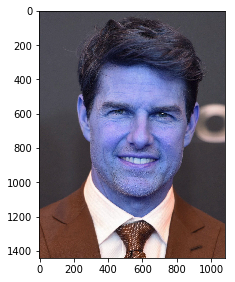

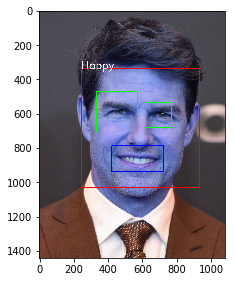

In [5]:
#turning into gray scale
gray1= cv2.imread('images\\Tom_cruise.jpg',0)

 # We get the output of our detect function.
canvas = detect(gray1, img)

    
# We display the outputs.
plt.figure(figsize=(30, 10))
plt.subplot(211)
plt.imshow(imgcopy)

plt.figure(figsize=(30, 10))
plt.subplot(212)
plt.imshow(canvas)
plt.show()

successfully detected face and eye and smile 

***

## Detection on live vedio

In [6]:
# Doing some Face Recognition with the webcam
video_capture = cv2.VideoCapture(0)
while True:
    _, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    canvas = detect(gray, frame)
    cv2.imshow('Video', canvas)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()

_____

#### Created by: MOHIT CHATURVEDI

_____